In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

In [3]:
fmnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

# Comparing PCA and tSNE

In [4]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

In [5]:
np.random.seed(675)
indices = np.random.choice(70000,10000, replace=False)

In [6]:
X = (fmnist.data).iloc[indices]
y = (fmnist.target)[indices]

In [7]:
X = StandardScaler().fit_transform(X)

In [8]:
X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame({
    'x_pca':X_pca[:,0],
    'y_pca':X_pca[:,1],
    'x_tsne':X_tsne[:,0],
    'y_tsne':X_tsne[:,1],
    'labels':y
})

<AxesSubplot:title={'center':'tSNE'}, xlabel='x_tsne', ylabel='y_tsne'>

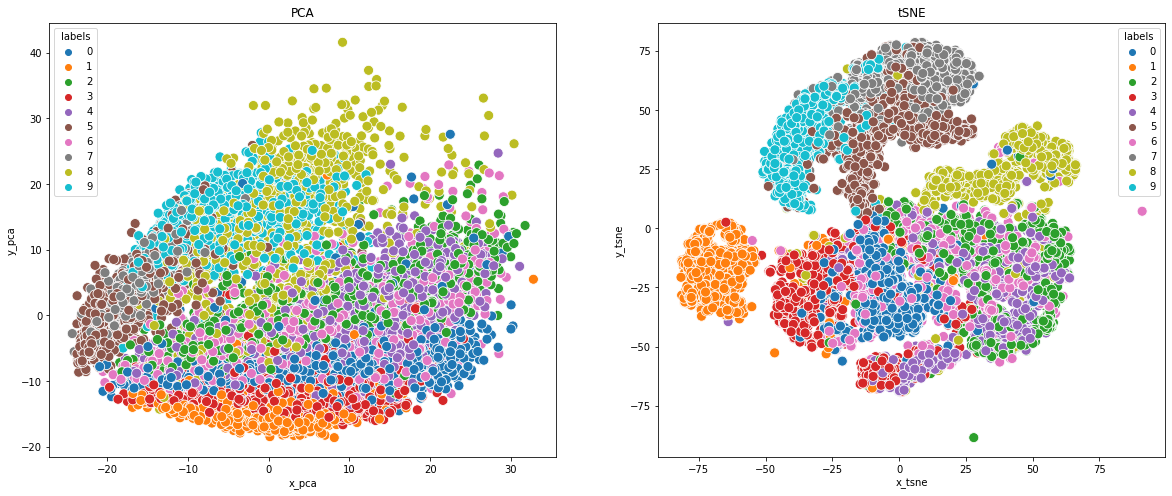

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
axs[0].set_title('PCA')
axs[1].set_title('tSNE')
sns.scatterplot(x='x_pca',y='y_pca',hue='labels',s=100, data=df, ax = axs[0])
sns.scatterplot(x='x_tsne',y='y_tsne',hue='labels',s=100,data=df,ax=axs[1])

<AxesSubplot:title={'center':'tSNE'}, xlabel='x_tsne', ylabel='y_tsne'>

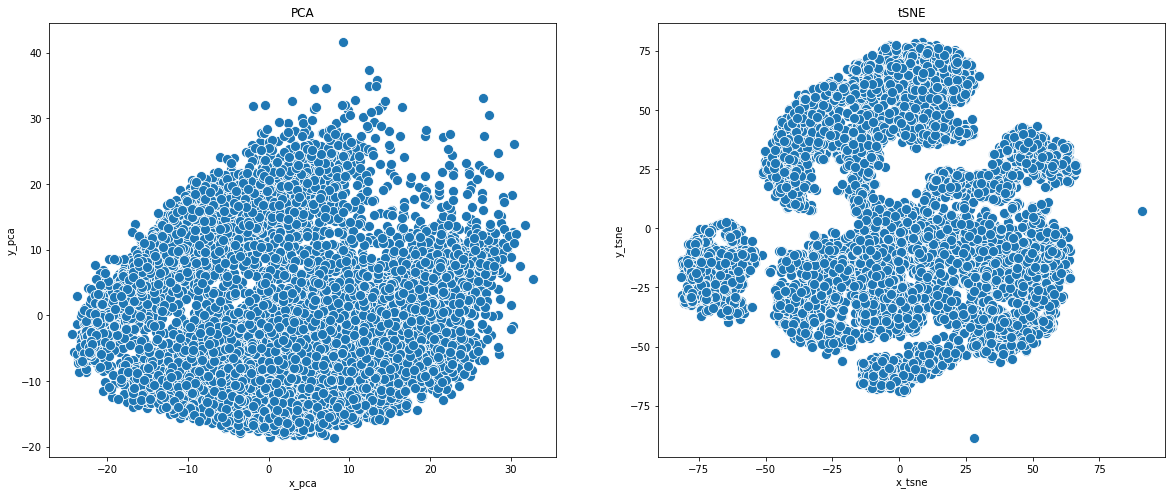

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
axs[0].set_title('PCA')
axs[1].set_title('tSNE')
sns.scatterplot(x='x_pca',y='y_pca',s=100, data=df, ax = axs[0])
sns.scatterplot(x='x_tsne',y='y_tsne',s=100,data=df,ax=axs[1])

A seperation of clusters is apparent with tSNE although there is still some mixing.

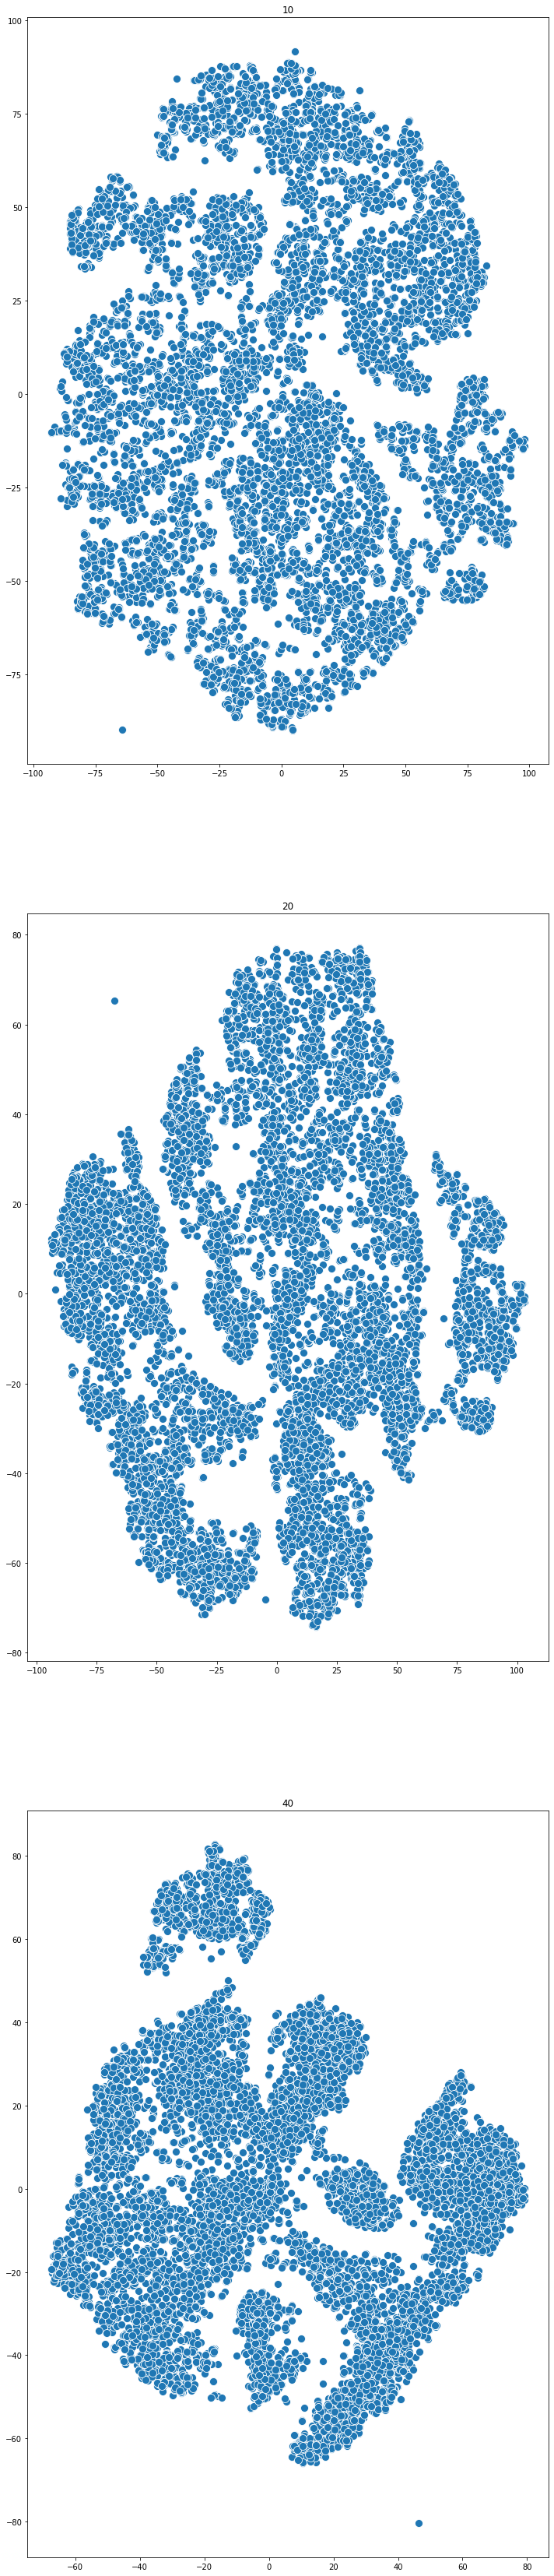

In [17]:
perplexity = [10,20,40]
fig,axs = plt.subplots(3,1,figsize= (12,60))
i = 0
for p in perplexity:
    tsne = TSNE(n_components=2,perplexity=p)
    X_tsne = tsne.fit_transform(X)
    sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1], s=100, ax=axs[i])
    axs[i].set_title(p)
    i+=1

20 seems to have good seperation.